In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.metrics as sk
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [2]:
%matplotlib inline 
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', 100)

In [4]:
import graphviz

In [3]:
os.getcwd()

'C:\\Users\\HP\\Python Assignments\\Project Advertizing clicks'

In [4]:
adv=pd.read_csv("advertising.csv")

In [5]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
adv.columns = adv.columns.str.replace(' ', '_')

In [7]:
adv.describe()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Clicked_on_Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [10]:
adv.describe(include=['object'])

,Ad_Topic_Line,City,Country,Timestamp
count,1000,1000,1000,1000
unique,1000,969,237,997
top,Enterprise-wide bi-directional secured line,Lisamouth,France,5/26/2016 15:40
freq,1,3,9,2


In [8]:
adv = adv.drop_duplicates()
print( adv.shape )

(1000, 10)


In [9]:
adv.Male.value_counts()

0    519
1    481
Name: Male, dtype: int64

In [10]:
correlations = adv.corr()
correlations

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Clicked_on_Ad
Daily_Time_Spent_on_Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area_Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily_Internet_Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked_on_Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


Text(0.5, 1.0, 'Daily Time Spent on Site(Clicked on Ad=1) ')

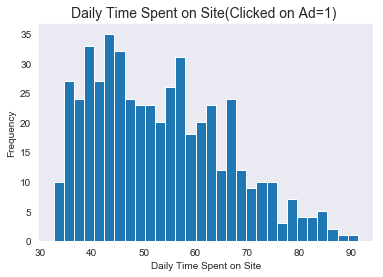

In [12]:
adv.Daily_Time_Spent_on_Site[adv.Clicked_on_Ad==1].hist(bins=30,grid=False)
plt.xlabel("Daily Time Spent on Site")
plt.ylabel("Frequency")
plt.title("Daily Time Spent on Site(Clicked on Ad=1) ",fontsize=14)

Text(0.5, 1.0, 'Daily Time Spent on Site(Clicked on Ad=1) ')

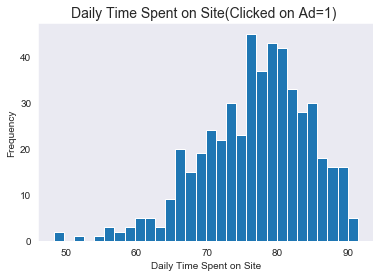

In [13]:
adv.Daily_Time_Spent_on_Site[adv.Clicked_on_Ad==0].hist(bins=30,grid=False)
plt.xlabel("Daily Time Spent on Site")
plt.ylabel("Frequency")
plt.title("Daily Time Spent on Site(Clicked on Ad=1) ",fontsize=14)

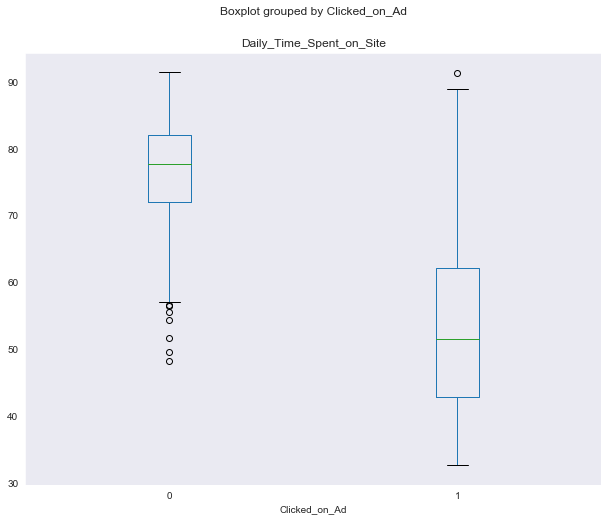

In [14]:
adv.boxplot(column="Daily_Time_Spent_on_Site",by="Clicked_on_Ad",figsize=(10,8),grid=False)

In [15]:
adv['Timestamp'] = pd.to_datetime(adv["Timestamp"] )

In [16]:
adv["month"] = adv['Timestamp'].dt.month
adv["day"] = adv['Timestamp'].dt.day
adv["dayofweek"] = adv['Timestamp'].dt.dayofweek
adv["hour"] = adv['Timestamp'].dt.hour
adv.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Male,Country,Timestamp,Clicked_on_Ad,month,day,dayofweek,hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:00,0,3,27,6,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:00,0,4,4,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:00,0,3,13,6,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:00,0,1,10,6,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:00,0,6,3,4,3


In [17]:
adv=adv.drop(columns="Timestamp")
adv.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Male,Country,Clicked_on_Ad,month,day,dayofweek,hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,27,6,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,4,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,13,6,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,1,10,6,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,6,3,4,3


In [18]:
adv.groupby('month').count()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Male,Country,Clicked_on_Ad,day,dayofweek,hour
month,,,,,,,,,,,,
1,147,147,147,147,147,147,147,147,147,147,147,147
2,160,160,160,160,160,160,160,160,160,160,160,160
3,156,156,156,156,156,156,156,156,156,156,156,156
4,147,147,147,147,147,147,147,147,147,147,147,147
5,147,147,147,147,147,147,147,147,147,147,147,147
6,142,142,142,142,142,142,142,142,142,142,142,142
7,101,101,101,101,101,101,101,101,101,101,101,101


In [19]:
dfmonth=adv.groupby('month')['Clicked_on_Ad'].sum()

In [20]:
dfmonth

month
1    69
2    83
3    74
4    74
5    79
6    71
7    50
Name: Clicked_on_Ad, dtype: int64

In [22]:
dfday=adv.groupby('dayofweek')['Clicked_on_Ad'].sum()

In [23]:
dfday

dayofweek
0    72
1    55
2    79
3    79
4    71
5    64
6    80
Name: Clicked_on_Ad, dtype: int64

In [24]:
le = preprocessing.LabelEncoder()

In [25]:
adv["Country"]=le.fit_transform(adv["Country"])

In [26]:
adv.head()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Ad_Topic_Line,City,Male,Country,Clicked_on_Ad,month,day,dayofweek,hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,215,0,3,27,6,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,147,0,4,4,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,184,0,3,13,6,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,103,0,1,10,6,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,96,0,6,3,4,3


In [27]:
df =adv.copy()

In [40]:
df=adv.drop(columns=["Clicked_on_Ad","Ad_Topic_Line","City"])
df.tail()

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Country,month,day,dayofweek,hour
995,72.97,30,71384.57,208.58,1,116,2,11,3,21
996,51.30,45,67782.17,134.42,1,26,4,22,4,2
997,51.63,51,42415.72,120.37,1,140,2,1,0,17
998,55.55,19,41920.79,187.95,0,85,3,24,3,2
999,45.01,26,29875.80,178.35,0,28,6,3,4,21


In [42]:
feature_names = np.array(df.columns)
features = df.copy()            #features = np.array(df)

labels = adv['Clicked_on_Ad'] #labels = adv['Clicked_on_Ad'].values

In [ ]:
#feature_names

In [45]:
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,test_size=0.3,random_state=14)

In [46]:
len(labels_train)

700

In [63]:
features_test[5:7]

,Daily_Time_Spent_on_Site,Age,Area_Income,Daily_Internet_Usage,Male,Country,month,day,dayofweek,hour
350,74.49,28,58996.12,237.34,0,165,1,30,5,16
22,41.49,52,32635.70,164.83,0,34,5,20,4,8


In [47]:
test_accuracy_score=[]
train_accuracy_score = []
random_state = []
for i in range(0,100):
    features_train,features_test,labels_train,labels_test = train_test_split(features,labels,test_size=0.3,random_state=i)
    model = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=4, min_samples_leaf=5)
    model.fit(features_train,labels_train)
    #predictions1=model.predict(labels_test)
    predictions = model.predict(features_test)
    prediction = model.predict(features_train)
    test_accuracy_score.append(accuracy_score(labels_test,predictions))
    train_accuracy_score.append(accuracy_score(labels_train,prediction))
    random_state.append(i)
    
k = []
for i in range(0,100):
    if test_accuracy_score[i]>= train_accuracy_score[i]:
        k.append(i)
k  # for this seed values train accuracy is less than seed accuracy

[15]

In [75]:
l = np.arange(0.05,0.55,0.05)
p = list(l)

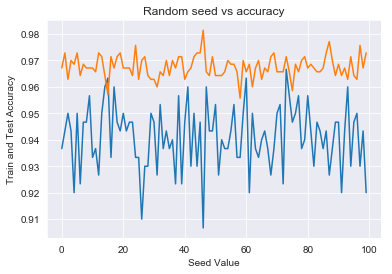

In [48]:
plt.plot(random_state,test_accuracy_score)
plt.plot(random_state,train_accuracy_score)

plt.title("Random seed vs accuracy")
plt.ylabel("Train and Test Accuracy")
plt.xlabel("Seed Value")

plt.show()

In [49]:
model = DecisionTreeClassifier(criterion = "gini", random_state = 14,
                               max_depth=4, min_samples_leaf=5)

model.fit(features_train,labels_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=14,
            splitter='best')

In [50]:
pred = model.predict(features_test)

In [51]:
print(accuracy_score(labels_test,pred))

0.92


In [52]:
c = confusion_matrix(labels_test, predictions)
c

array([[136,  11],
       [ 13, 140]], dtype=int64)

In [55]:
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection

In [56]:
X = features_train
Y = labels_train
kfold = model_selection.KFold(n_splits=10, random_state=14)
cart = DecisionTreeClassifier(criterion = "gini", random_state = 14, max_depth=4, min_samples_leaf=5)
bagmodel = BaggingClassifier(base_estimator=cart, n_estimators=50, random_state=14)
results = model_selection.cross_val_score(bagmodel, X, Y, cv=kfold)
bagmodel.fit(X,Y)
print(results.mean())
bagpred = bagmodel.predict(features_test)
print(accuracy_score(labels_test,bagpred))

0.9542857142857143
0.93


In [69]:
confusion_matrix(labels_test, bagpred)

array([[135,  12],
       [  9, 144]], dtype=int64)

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rfmodel = RandomForestClassifier(n_estimators=50, max_features=5)
rfmodel.fit(X,Y)
rfpred = rfmodel.predict(features_test)
resultsrf = model_selection.cross_val_score(rfmodel, X, Y, cv=kfold)
print(resultsrf.mean())
print(accuracy_score(labels_test,rfpred))   #champion model

0.9642857142857144
0.9566666666666667


In [70]:
confusion_matrix(labels_test,rfpred)

array([[142,   5],
       [  8, 145]], dtype=int64)

In [58]:
from sklearn.ensemble import AdaBoostClassifier

In [60]:
abmodel = AdaBoostClassifier(n_estimators=50, random_state=14)
abmodel.fit(X,Y)
abpred = abmodel.predict(features_test)
abresults = model_selection.cross_val_score(abmodel, X, Y, cv=kfold)
print(abresults.mean())
print(accuracy_score(labels_test,abpred))

0.962857142857143
0.9433333333333334


In [71]:
confusion_matrix(labels_test,abpred)

array([[140,   7],
       [ 10, 143]], dtype=int64)

In [68]:
rfmodel.predict(features_test[5:7]) == labels_test[5:7]

350    True
22     True
Name: Clicked_on_Ad, dtype: bool